In [35]:
import pandas as pd
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/Users/helenamabey/Downloads/retirement_funds-1.csv' )
df

,Fund Number,Market Cap,Type,Assets,Turnover Ratio,Beta,SD,Risk,1YrReturn%,3YrReturn%,5YrReturn%,10YrReturn%,Expense Ratio,Star Rating
0,RF001,Large,Growth,309.9,12.21,1.15,18.72,Low,28.99,24.26,11.06,8.97,1.22,Four
1,RF002,Large,Growth,23.3,0.00,2.19,35.72,High,33.40,22.72,-4.89,0.02,1.90,Two
2,RF003,Large,Growth,141.5,147.00,2.24,36.69,High,33.98,21.91,1.53,12.55,1.92,Two
3,RF004,Large,Growth,118.5,5.00,2.24,36.63,High,33.78,21.89,1.57,12.69,1.73,Two
4,RF005,Large,Growth,575.3,121.00,0.89,14.56,Low,21.62,16.47,9.40,10.30,1.41,Five
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,RF312,Small,Value,73.4,32.86,1.19,19.60,Average,12.47,8.88,6.08,9.56,1.09,Two
312,RF313,Small,Value,1053.5,12.00,1.16,19.42,Average,13.83,8.72,2.34,9.90,1.10,Three
313,RF314,Small,Value,48.2,201.00,1.23,20.16,Average,15.79,8.58,1.51,4.24,1.53,One
314,RF315,Small,Value,65.1,16.72,1.20,19.36,Average,15.30,7.43,3.46,9.16,1.71,Three


In [5]:
filtered_df = df[['Market Cap','Risk','Star Rating']]
filtered_df

,Market Cap,Risk,Star Rating
0,Large,Low,Four
1,Large,High,Two
2,Large,High,Two
3,Large,High,Two
4,Large,Low,Five
...,...,...,...
311,Small,Average,Two
312,Small,Average,Three
313,Small,Average,One
314,Small,Average,Three


In [87]:
#Used ChaptGPT to get all the fundamentals of creating a pivot table in pandas (next few cells included)
df_pivot = pd.pivot_table(
    df,
    values='Fund Number', 
    index=['Market Cap', 'Risk'], 
    columns='Star Rating',
    aggfunc='count', 
    fill_value=0  
)

df_pivot

Star Rating         Five  Four  One  Three  Two
Market Cap Risk                                
Large      Average     1     2    3      4    4
           High        0     0    1      0    3
           Low        10    42    6     54   23
Mid-Cap    Average     2     7    3     13   14
           Low         6    25    1     16    4
Small      Average     1     6    3     18   10
           High        0     1    6      1    1
           Low         3    15    0      4    3

In [89]:
#Reordered columns to logical order
df_pivot = df_pivot[['Five', 'Four', 'Three', 'Two', 'One']]
df_pivot

Star Rating         Five  Four  Three  Two  One
Market Cap Risk                                
Large      Average     1     2      4    4    3
           High        0     0      0    3    1
           Low        10    42     54   23    6
Mid-Cap    Average     2     7     13   14    3
           Low         6    25     16    4    1
Small      Average     1     6     18   10    3
           High        0     1      1    1    6
           Low         3    15      4    3    0

In [91]:
#Reordered index to logical order
df_pivot = df_pivot.sort_index(level='Risk', ascending=False)

df_pivot = df_pivot.reindex(index=pd.MultiIndex.from_product(
    [df_pivot.index.get_level_values('Market Cap').unique(),
     ['High', 'Average', 'Low']],
    names=['Market Cap', 'Risk']))

df_pivot

Star Rating         Five  Four  Three   Two  One
Market Cap Risk                                 
Small      High      0.0   1.0    1.0   1.0  6.0
           Average   1.0   6.0   18.0  10.0  3.0
           Low       3.0  15.0    4.0   3.0  0.0
Mid-Cap    High      NaN   NaN    NaN   NaN  NaN
           Average   2.0   7.0   13.0  14.0  3.0
           Low       6.0  25.0   16.0   4.0  1.0
Large      High      0.0   0.0    0.0   3.0  1.0
           Average   1.0   2.0    4.0   4.0  3.0
           Low      10.0  42.0   54.0  23.0  6.0

In [93]:
#Removed NaN values and replaced with 0 to pull numbers back to integers
#Final Pivot Table for tabulation
df_pivot = df_pivot.fillna(0).astype(int)
df_pivot

Star Rating         Five  Four  Three  Two  One
Market Cap Risk                                
Small      High        0     1      1    1    6
           Average     1     6     18   10    3
           Low         3    15      4    3    0
Mid-Cap    High        0     0      0    0    0
           Average     2     7     13   14    3
           Low         6    25     16    4    1
Large      High        0     0      0    3    1
           Average     1     2      4    4    3
           Low        10    42     54   23    6

### What conclusions can be reached concerning differences among the categories of funds, risk objective, and ratings?

#### By reviewing the Retirement Funds information on categories of funds, risk objectives , and ratings, we can see that there are very few high risk funds included in this review. The majority of funds are low risk regardless of Market Cap. Most of the funds are rating moderately, between 2 and 4 with few outliers with a high rating of 5 and even fewer with a low rating of 1.

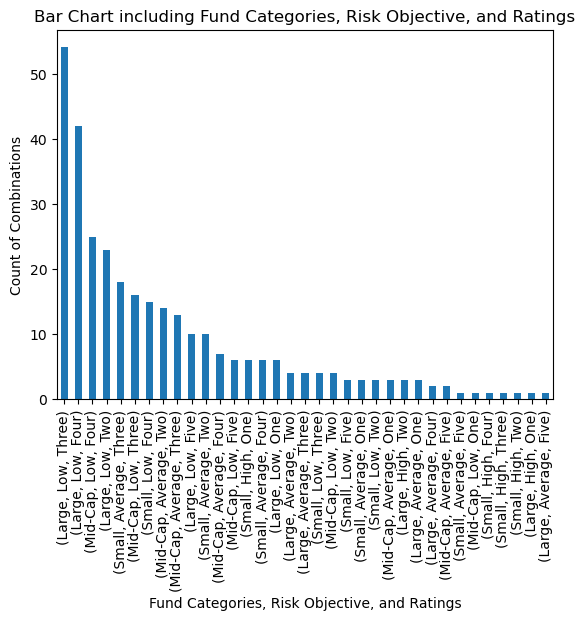

In [193]:
#Bar Chart with three values. If you order by greatest on the left, you can show the highest percentage clearly
aggregated_data = df.groupby(['Market Cap', 'Risk', 'Star Rating']).size()
aggregated_data = aggregated_data.sort_values(ascending=False)

aggregated_data.plot(kind='bar')
plt.title('Bar Chart including Fund Categories, Risk Objective, and Ratings')
plt.xlabel('Fund Categories, Risk Objective, and Ratings')
plt.ylabel('Count of Combinations')
plt.show()

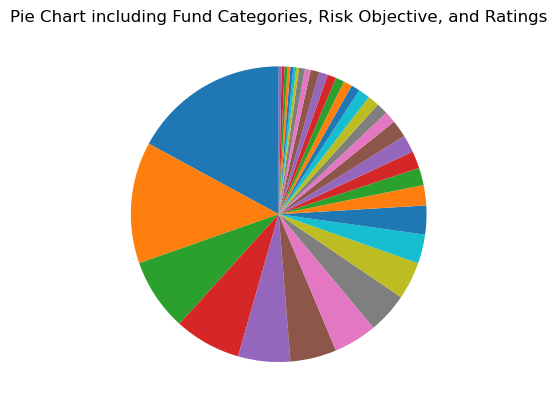

In [169]:
#Pie Chart with three values. I had to remove all labels and the legend to make this even readable. 
#Pie charts should not be used for more than three or four values or they become meaningless.
aggregated_data.plot(
    kind='pie',
    #autopct='%1.1f%%',
    startangle=90,
    legend=False,
    labels=None
)
plt.title('Pie Chart including Fund Categories, Risk Objective, and Ratings')
plt.show()

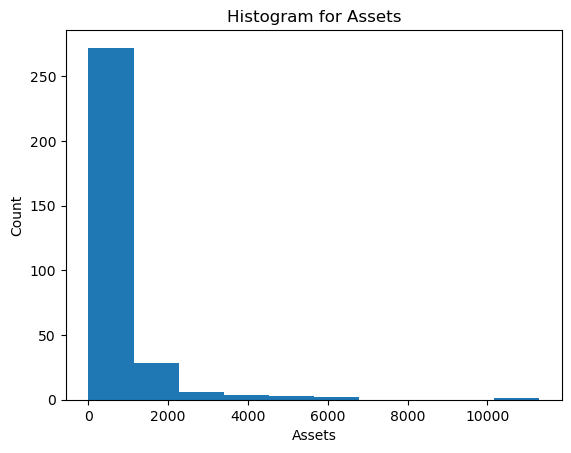

In [171]:
#Histogram for Assets
plt.hist(df['Assets']) 
plt.title("Histogram for Assets")
plt.xlabel("Assets")
plt.ylabel("Count")
plt.show()

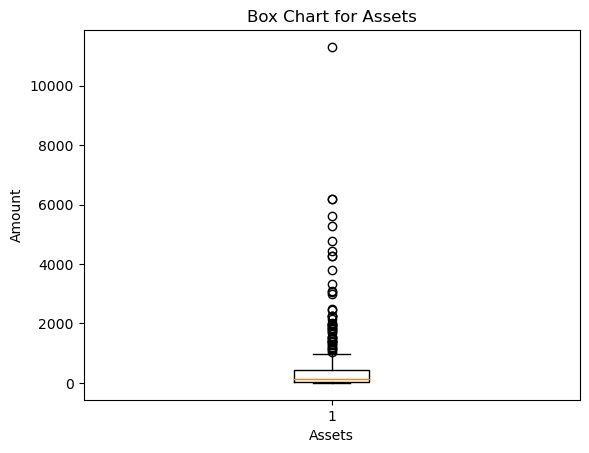

In [199]:
#Box Chart for Assets
plt.boxplot(df['Assets'])
plt.title("Box Chart for Assets")
plt.xlabel("Assets")
plt.ylabel("Amount")
#plt.ylim(-50, 6000) 
plt.show()

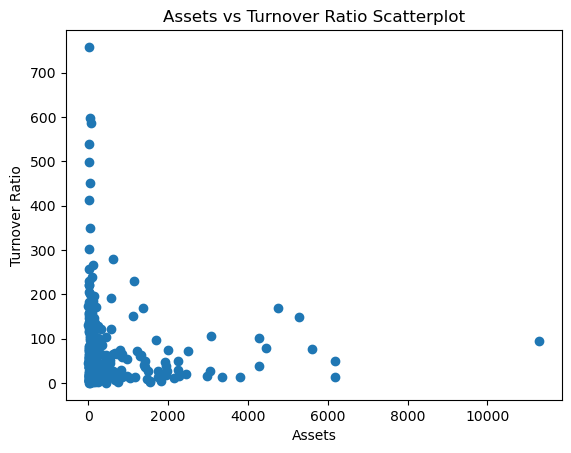

In [179]:
#The next charts are a combination of the numeric variables in multiple pair combinations.
plt.scatter(df['Assets'], df['Turnover Ratio'])
plt.title("Assets vs Turnover Ratio Scatterplot")
plt.xlabel("Assets")
plt.ylabel("Turnover Ratio")
plt.show()

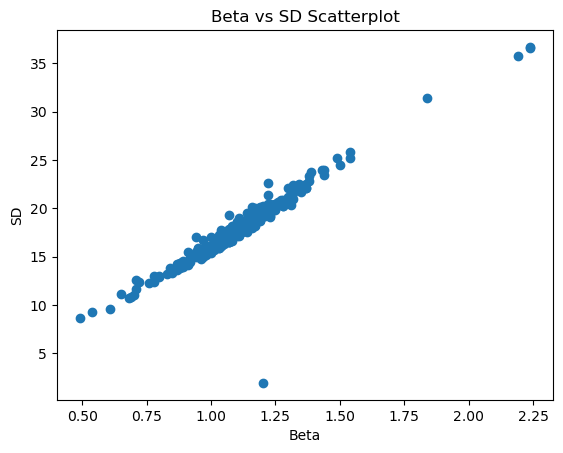

In [181]:
plt.scatter(df['Beta'], df['SD'])
plt.title("Beta vs SD Scatterplot")
plt.xlabel("Beta")
plt.ylabel("SD")
plt.show()

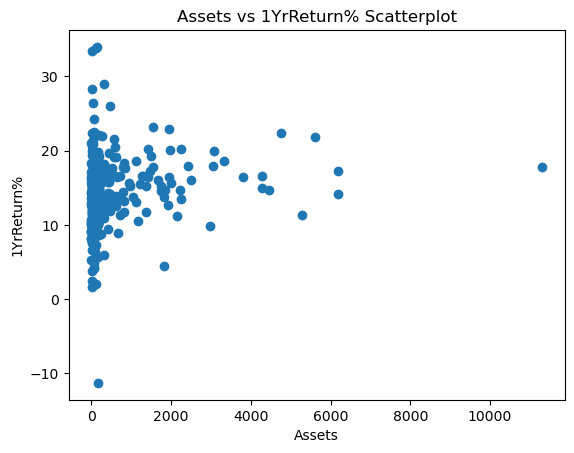

In [183]:
plt.scatter(df['Assets'], df['1YrReturn%'])
plt.title("Assets vs 1YrReturn% Scatterplot")
plt.xlabel("Assets")
plt.ylabel("1YrReturn%")
plt.show()

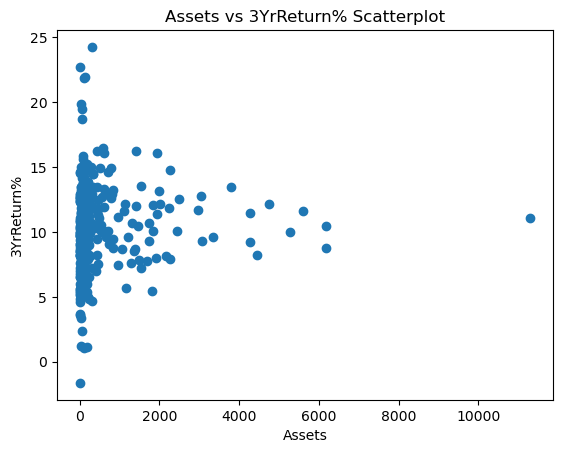

In [185]:
plt.scatter(df['Assets'], df['3YrReturn%'])
plt.title("Assets vs 3YrReturn% Scatterplot")
plt.xlabel("Assets")
plt.ylabel("3YrReturn%")
plt.show()

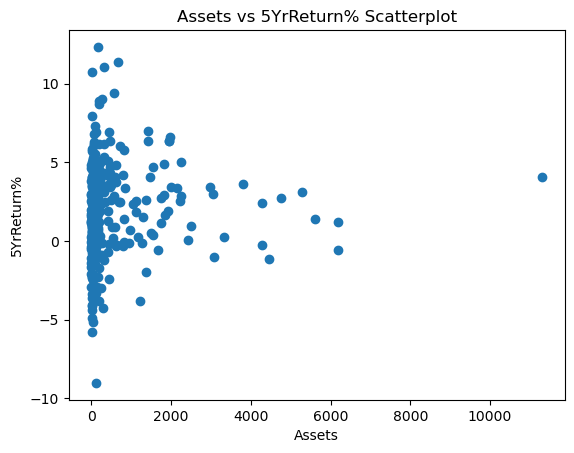

In [187]:
plt.scatter(df['Assets'], df['5YrReturn%'])
plt.title("Assets vs 5YrReturn% Scatterplot")
plt.xlabel("Assets")
plt.ylabel("5YrReturn%")
plt.show()

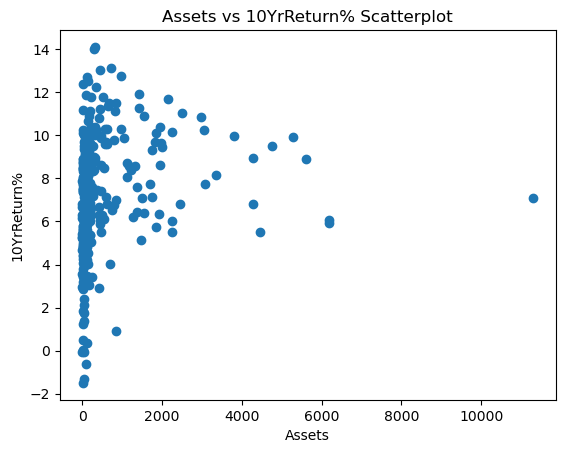

In [201]:
plt.scatter(df['Assets'], df['10YrReturn%'])
plt.title("Assets vs 10YrReturn% Scatterplot")
plt.xlabel("Assets")
plt.ylabel("10YrReturn%")
plt.show()

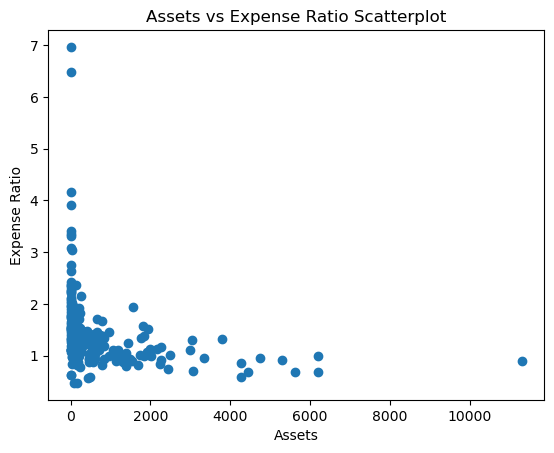

In [203]:
plt.scatter(df['Assets'], df['Expense Ratio'])
plt.title("Assets vs Expense Ratio Scatterplot")
plt.xlabel("Assets")
plt.ylabel("Expense Ratio")
plt.show()

### What conclusions can be reached on retirement funds can be reached based on the above charts?

#### By reviewing the bar chart for categories of funds, risk objective, and ratings we can see that many of the funds reviewed were large cap, low risk, with a moderate rating of four or five. By sorting the bar chart from highest to lowest (not ascending), this can be seen at a glance. The pie chart does not provide insight because the number of combinations was so great that the pie slices were indistinguishable. It can still be seen that there were two large segments but, because of the number of slices, labels were removed to allow a view of the chart. In a review of the assets, the histogram shows a solid right-skew with the majority of the assets falling below 2000. There is a single outlier at 10000. A similar trend can be seen in the box and whisker chart. This chart is skewed because of the one outlier making it challenging to obtain detailed information about the results. A few numeric pairs were run as scatterplots to see if there was any correlation of the data. It does appear that there is a relationship between asset amount and the turnover ratio. The lower the asset amount, the more likely there is to be a higher turnover percentage. As the asset amount grows, the turnover ratio stabilizes. Another numeric pair that appears to have a direct relationship are Beta and SD. As Beta increases, SD increases at a constaint rate. The assets in ratio to the 1, 3, 5, and 10 year return percentages each follow a similar pattern based on asset size. This pattern carries over regardless of the number of years. The percentages increase and decease over time but the pattern remains. The outlier pattern also remains contstant along side the majority.